# 粒子群算法

## 1. 基本粒子群算法

假设在一个Ｄ维的目标搜索空间中，有Ｎ个粒子组成一个群落，其中第ｉ个粒子表示为一个Ｄ维的向量：

$$X_i=(x_{i1},x_{i2},\dots,x_{iD}), i=1,2,\dots,N \tag{1}$$

第i个粒子的“飞行”速度也是一个D维的向量，记为：

$$V_i=(v_{i1},v_{i2},\dots,v_{iD}), i=1,2,\dots,N \tag{2}$$

第i个粒子迄今为止搜索到的最优位置称为个体极值，记为：

$$p_{best}=(p_{i1},p_{i2},\dots,p_{iD}),i=1,2,\dots,N \tag{3}$$

整个粒子群迄今为止搜索到的最优位置为全局极值，记为：

$$g_{best}=(g_{1},g_{2},\dots,g_{D})\tag{4}$$

在找到这两个最优值时，粒子根据如下的式（5）和式（6）来更新自己的速度和位置

$$v_{ij}(t+1)=v_{ij}(t)+c_1r_1(t)[p_{ij}(t)-x_ij(t)]+c_2r_2(t)[p_{gj}(t)-x_{ij}(t)] \tag{5}$$

$$x_{ij}(t+1)=x_{ij}(t)+v_{ij}(t+1) \tag{6}$$

其中：$c_1$和$c_2$为学习因子，也称加速常数；$r_1$和$r_2$为[0,1]范围内的均匀随机数；$j=1,2,\dots,D$；$v_{ij}$是粒子的速度，$v_{ij}\in［-v_{max},v_{max}］$，$v_{max}$是常数，由用户设定来限制粒子的速度。

标准粒子群算法的更新是这样的，就是在速度的前面加一个**权重系数**。

$$v_{ij}(t+1)=w\cdot v_{ij}(t)+c_1r_1(t)[p_{ij}(t)-x_{ij}(t)]+c_2r_2(t)[g_{j}(t)-x_{ij}(t)] \tag{7}$$

$$x_{ij}(t+1)=x_{ij}(t)+v_{ij}(t+1) \tag{8}$$

$$w=w_{max}-\frac{(w_{max}-w_{min})\cdot t}{T_{max}} \tag{9}$$

## 2. 离散粒子群算法

就是将实数进行二进制编码，然后依然保持了位置速度更新公式。粒子在状态空间的取值和变化只限于0和1两个值，而速度的每一维$v_{ij}$代表位置每一位$x_{ij}$取值为1的可能性。因此，在连续粒子群中的$v_{ij}$更新公式依然保持不变，但是$p_{best}$和$g_{best}$只在[0,1]内取值。其位置更新等式表示如下：

$$s(v_{i,j})=\frac{1}{1+\exp(-v_{i,j})} \tag{10}$$

$$x_{i,j}=\begin{cases}
1 & r<s(v_{i,j}) \\
0 & others
\end{cases} \tag{11}$$

其中，r是服从均匀分布rand(0,1)中产生的随机数

## 3. 粒子群算法流程

1. 初始化粒子群，包括群体规模N，每个粒子的位置$x_i$和速度$v_i$

2. 计算每个粒子的适应度值fit[i]

3. 对每个粒子，用它的适应度值fit[i]和个体极值pbest(i)比较。如果fit[i]＜pbest(i)，则用fit[i]替换掉pbest(i)

4. 对每个粒子，用它的适应度值fit[i]和全局极值gbest比较。如果fit[i]＜gbest，则用fit[i]替换gbest

5. 迭代更新粒子的速度$v_i$和位置$x_i$

6. 进行边界条件处理

7. 判断算法终止条件是否满足：若是，则结束算法并输出优化结果；否则返回步骤2


## 4. 代码示例

1. 使用连续PSO求解

求函数$f(x,y)=3cos(xy)+x+y^2$的最小值，其中$x$的取值范围为[-4,4]，$y$的取值范围为[-4,4]

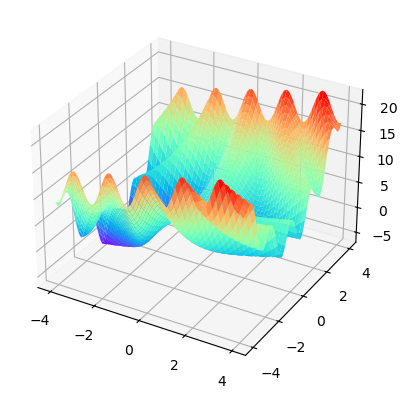

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X=np.arange(-4,4,0.01)
Y=np.arange(-4,4,0.01)
x,y=np.meshgrid(X,Y)
z=3*np.cos(x*y)+x+y**2

fig=plt.figure()
ax3=plt.axes(projection='3d')
ax3.plot_surface(x,y,z,cmap='rainbow')
plt.show()

the best value is  -17.956264678618332 the best position is  [-15.          -0.20882077]


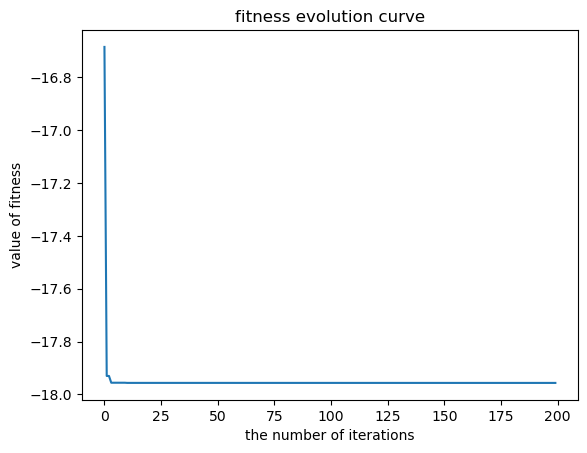

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

N=100
D=2
T=200
c1=c2=1.5
w_max,w_min=0.8,0.4
x0_max,x0_min=-5,-15
x1_max,x1_min=3,-3
v_max,v_min=1,-1

def func(x):
    return 3*np.cos(x[0]*x[1])+x[0]+x[1]**2

x=np.random.rand(N,D)
x[:,0]=x[:,0]*(x0_max-x0_min)+x0_min
x[:,1]=x[:,1]*(x1_max-x1_min)+x1_min
v=np.random.rand(N,D)*(v_max-v_min)+v_min

p=x
p_best=np.ones(N)
for i in range(N):
    p_best[i]=func(x[i,:])

g_best=2**31
gb=np.ones(T)
x_best=np.ones(D)

for i in range(T):
    w=w_max-(w_max-w_min)*i/T
    for j in range(N):
        if p_best[j]>func(x[j,:]):
            p_best[j]=func(x[j,:])
            p[j,:]=x[j,:].copy()

        if g_best>p_best[j]:
            g_best=p_best[j]
            x_best=x[j,:].copy()

        v[j,:]=w*v[j,:]+c1*np.random.rand(1)*(p[j,:]-x[j,:])+c2*np.random.rand(1)*(x_best-x[j,:])
        x[j,:]=x[j,:]+v[j,:]

        v[j,:]=np.clip(v[j,:],v_min,v_max)
        x[j,0]=np.clip(x[j,0],x0_min,x0_max)
        x[j,1]=np.clip(x[j,1],x1_min,x1_max)

    gb[i]=g_best

print('the best value is ',gb[T-1],'the best position is ',x_best)

plt.plot(range(T),gb)
plt.xlabel("the number of iterations")
plt.ylabel("value of fitness")
plt.title("fitness evolution curve")
plt.show()

2. 使用离散PSO求解：

用离散粒子群算法求函数$f(x)=x+6sin(4x)+9cos(5x)$的最小值，其中$x$的取值范围为[0,9]

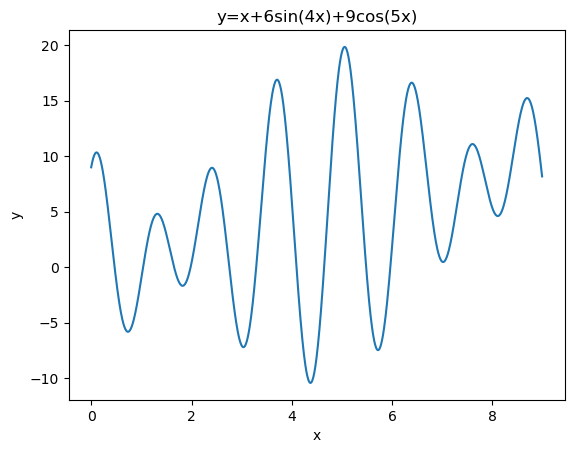

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X=np.arange(0,9,0.01)
Y=X+6*np.sin(4*X)+9*np.cos(5*X)

plt.figure()
plt.plot(X,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=x+6sin(4x)+9cos(5x)')
plt.show()

the best value is  -10.419860877843337 the best position is  4.371687289893427


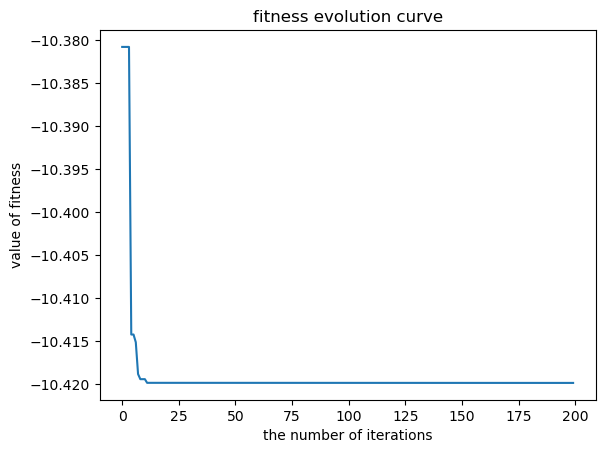

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

N=100
D=20
T=200
c1,c2=1.5,1.5
w_max,w_min=0.8,0.8
x_max,x_min=9,0
v_max,v_min=10,-10
x=np.random.randint(0,2,[N,D])
v=(v_max-v_min)*np.random.rand(N,D)+v_min
vx=np.zeros_like(v)

def func2(binary_vector):
    binary_str=''.join(str(bit) for bit in binary_vector)
    x_int=int(binary_str,2)
    x_real=x_min+(x_max-x_min)*x_int/(2**D-1)
    return x_real+6*np.sin(4*x_real)+9*np.cos(5*x_real)

p=x
p_best=np.array([func2(x_i) for x_i in x])

g_best=2**31
gb=np.ones(T)
x_best=np.ones(D)

for i in range(T):
    w=w_max-(w_max-w_min)*i/T
    for j in range(N):
        if p_best[j]>func2(x[j,:]):
            p_best[j]=func2(x[j,:])
            p[j,:]=x[j,:].copy()

        if g_best>p_best[j]:
            g_best=p_best[j]
            x_best=x[j,:].copy()

        v[j,:]=w*v[j,:]+c1*np.random.rand()*(p[j,:]-x[j,:])+c2*np.random.rand()*(x_best-x[j,:])

        for k in range(D):
            if (v[j,k]>v_max) or (v[j,k]<v_min):
                v[j,k]=v_min+(v_max-v_min)*np.random.rand()

        vx[j,:]=1/(1+np.exp(-v[j,:]))
        x[j,:]=[1 if k>np.random.rand() else 0 for k in vx[j,:]]

    gb[i]=g_best

binary_str=''.join(str(bit) for bit in x_best)
x_int=int(binary_str,2)
x_optimal=x_min+(x_max-x_min)*x_int/(2**D-1)
print('the best value is ',gb[T-1],'the best position is ',x_optimal)
plt.plot(range(T),gb)
plt.xlabel("the number of iterations")
plt.ylabel("value of fitness")
plt.title("fitness evolution curve")
plt.show()

3.离散PSO求解0-1背包问题

0-1背包问题。有N件物品和一个容量为V的背包。第i件物品的体积是c（i），价值是w（i）。求解将哪些物品放入背包可使物品的体积总和不超过背包的容量，且价值总和最大。假设物品数量为10，背包的容量为300。每件物品的体积为［95，75，23，73，50，22，6，57，89，98］，每件物品的价值为［89，59，19，43，100，72，44，16，7，64］。

the best value is  388.0 the best position is  [1 0 1 0 1 1 1 0 0 1]


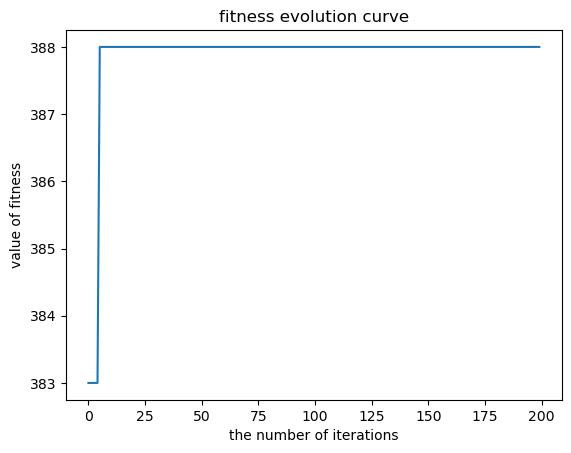

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def func3(x):
    value,count=0,0
    for i in range(len(x)):
        if x[i]==1:
            value+=values[i]
            count+=volumn[i]
        
    if count<=300:
        return value
    elif count>300:
        return value-2**10
    
N=100
D=10
T=200
c1,c2=1.5,1.5
w_max,w_min=0.8,0.8
v_max,v_min=10,-10
x=np.random.randint(0,2,[N,D])
v=np.random.rand(N,D)*(v_max-v_min)+v_min
vx=np.zeros_like(v)
values=[89,59,19,43,100,72,44,16,7,64]
volumn=[95,75,23,73,50,22,6,57,89,98]

p=x
p_best=np.array([func3(x_i) for x_i in x])

g_best=-2**10
gb=np.ones(T)
x_best=np.ones(D)

for i in range(T):
    w=w_min+(w_max-w_min)*i/T
    for j in range(N):
        if p_best[j]<func3(x[j,:]):
            p_best[j]=func3(x[j,:])
            p[j,:]=x[j,:].copy()

        if g_best<p_best[j]:
            g_best=p_best[j]
            x_best=x[j,:].copy()

        v[j,:]=w*v[j,:]+c1*np.random.rand()*(p[j,:]-x[j,:])+c2*np.random.rand()*(x_best-x[j,:])

        for k in range(D):
            if (v[j,k]>v_max) or (v[j,k]<v_min):
                v[j,k]=np.random.rand()*(v_max-v_min)+v_min
        
        vx[j,:]=1/(1+np.exp(-v[j,:]))
        x[j,:]=[1 if k>np.random.rand() else 0 for k in vx[j,:]]

    gb[i]=g_best

print('the best value is ',gb[T-1],'the best position is ',x_best)
plt.plot(range(T),gb)
plt.xlabel("the number of iterations") 
plt.ylabel("value of fitness")
plt.title("fitness evolution curve")
plt.show()

# 一些初始化的方法

## 1. Latin Hypercube Sampling
It creates a grid in the search space by dividing each dimension into equal interval segments, and then generates some random points within some interval.  In the LHS, a set of samples are distributed so that they can sparsely distribute in the search space so as to effectively avoid the problem of over aggregation of sampling points.

But it does not show a distinct advantage for higher-dimensional problems.

Here is a code example:

In [6]:
import numpy as np

def LHS(lower_bounds,upper_bounds,n_samples):
    dim=len(lower_bounds)
    samples=np.zeros((n_samples.dim))

    for d in range(dim):
        bounds=np.linspace(lower_bounds[d],upper_bounds[d],n_samples+1)
        temp=np.random.uniform(bounds[:-1],bounds[1:],size=n_samples)
        np.random.shuffle(temp)
        samples[:,d]=temp

    return samples

## 2. Beta Distribution
A beta distribution is a continuous probability distribution over the interval (0,1). Its probability density function (PDF) is given by

$$
f(x;a,b)=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}x^{a-1}(1-x)^{b-1}
$$

This distribution has two shape parameters ($a>0,b>0$) that essentially control the shape of the distribution. Its notation is usually written as $X~Be(a,b)$. Its expected value is $\mu=\frac{a}{a+b}$ and its variance is $\frac{ab}{(a+b)(a+b+1)}$.

## 3. Uniform Distribution
Its probability density function is given by
$$
f(x) = 
\begin{cases}
    \frac{1}{b-a}, & \text{if } x \in (a,b) \\
    0, & otherwise
\end{cases}
$$

## 4. Normal Distribution
Its probability density function is given by
$$
f(x)=\frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}
$$

## 5. Logarithmic Normal Distribution
Its probability density function is given by
$$
f(x)=\frac{1}{x\sigma\sqrt{2 \pi}} e^{-\frac{(ln(x)-\mu)^2}{2 \sigma^2}}
$$

## 6. Exponential Distribution

Its probability density function is given by ($\lambda>0$)
$$
f(x)=
\begin{cases}
    \lambda e^{-\lambda x}, & \text{if } x \geq 0 \\
    0, & \text{if } x<0
\end{cases}
$$

## 7. Rayleigh Distribution
Its probability density function is given by
$$
f(x)=\frac{x}{\sigma^2} e^{-\frac{x^2}{2 \sigma^2}}, x>0
$$
Its expected value is $\sqrt{\frac{\pi}{2}}$ and its variance is $\frac{4-\pi}{2}\sigma^2$.

## 8. Weibull Distribution
Its probability density function is given by
$$
f(x;\lambda,k)=
\begin{cases}
\frac{k}{\lambda}(\frac{x}{\lambda})^{k-1}e^{-(\frac{x}{\lambda})^k}, & \text{if } x\geq 0 \\
0, & \text{if } x<0
\end{cases}
$$

## Numerical Experiments

### Table 1: Basic Benchmark Functions
|Name|Function|Search Range|$x^{\mathrm{opt}}$|Opt|
|-|-|-|-|-|
|Rosenbrock|$f_1(X) = \sum_{i=1}^{D-1} \left[ 100(x_{i+1} - x_i^2)^2 + (x_i - 1)^2 \right]$|$[-5, 5]^D$|$(1, 1, \cdots, 1)$|0|
|Ackley|$f_2(X) = -20 \exp\left(-0.2\sqrt{\frac{1}{D} \sum_{i=1}^{D} x_i^2}\right) - \exp\left(\frac{1}{D} \sum_{i=1}^{D} \cos(2\pi x_i)\right) + 20 + e$|$[-10, 10]^D$|$(0, 0, \cdots, 0)$|0|
|Sphere|$f_3(X) = \sum_{i=1}^{D} x_i^2$|$[-5, 5]^D$|$(0, 0, \cdots, 0)$|0|
|Rastrigin|$f_4(X) = \sum_{i=1}^{D} \left[ x_i^2 - 10 \cos(2\pi x_i) \right] + 10$|$[-5.12, 5.12]^D$|$(0, 0, \cdots, 0)$|0|
|Griewank|$f_5(X) = \frac{1}{4000} \sum_{i=1}^{D} x_i^2 - \prod_{i=1}^{D} \cos\left(\frac{x_i}{\sqrt{i}}\right) + 1$|$[-600, 600]^D$|$(0, 0, \cdots, 0)$|0|
|Zakharov|$f_6(X) = \sum_{i=1}^{D} x_i^2 + \left(\frac{1}{2} \sum_{i=1}^{D} i x_i\right)^2 + \left(\frac{1}{2} \sum_{i=1}^{D} i x_i\right)^4$|$[-100, 100]^D$|$(0, 0, \cdots, 0)$|0|
|Alpine|$f_7(X) = \sum_{i=1}^{D} \left[ x_i \sin(x_i) + 0.1 x_i \right]$|$[-10, 10]^D$|$(0, 0, \cdots, 0)$|0|
|Easom|$f_8(X) = \left[ -\prod_{i=1}^{D} \cos(x_i) \right] \exp\left(-\sum_{i=1}^{D} (x_i - \pi)^2\right)$|$[-100, 100]^D$ | $(\pi, \pi, \cdots, \pi)$|-1|
|Schwefel|$f_9(X) = 418.98288727243369 \times D - \sum_{i=1}^{D} x_i \sin(\sqrt{\|x_i\|})$|$[-500, 500]^D$|$(420.96857, \cdots, 420.96857)$|0|

## Conclusions
We can draw some conclusions:

1. When the number of iterations is multiplied by the population size as a fixed value, a larger population size is required for PSO-w 

2. The PSO-w performs differently for different initialization methods, and the most appropriate initialization methods are random, beta distribution, and LHS.

3. The average distance between the initial population and the real optimal solution does not have any significant correlation with the quality of the nal solution for the algorithms. That is to say, the final solutions obtained are not usually a effcted by the locality of the optimal solutions. Thus, as long as the diversity of the population is high and the number of iterations is large, all these algorithms are capable of finding the optimal solutions.

# PSO收敛的充分条件

It can be proved that if the function ($ \mathcal{E}: \mathbb{R}^d\to\mathbb{R}$)has the following features, we can find its global minimum with PSO-w.

1. $\text{there exists } x^{*} \in \mathbb{R}^d \text{ such that } \mathcal{E}(x^*)=inf_{x \in \mathbb{R}^d} \mathcal{E}(x)=: \underline{\mathcal{E}}$

2. $\text{there exists some constant } L_{\mathcal{E}}>0 \text{ such that }$
$$
|\mathcal{E}(x)-\mathcal{E}(x')| \leq L_{\mathcal{E}}(|x|+|x'|)|x-x'| \text{, for all } x, x' \in \mathbb{R}^d
$$ 

3. $\text{either } \overline{\mathcal{E}}:=sup_{x \in \mathbb{R}^d} \mathcal{E}(x)<\infty \text{ or there exists constant }c_{\mathcal{E}}, R>0 \text{ such that }$
$$
\mathcal{E}(x)-\overline{\mathcal{E}} \geq c_{\mathcal{E}}|x|^2, \text{, for all } x \in \mathbb{R}^d \text{ with } |x|\geq R
$$

4. $\mathcal{E} \in C^2(\mathbb{R}^d) \text{ with } ||\nabla^2\mathcal{E}||_{\infty} \leq C_{\mathcal{E}} \text{, for some constant } C_{\mathcal{E}}>0$

5. $\text{there exist } \eta>0 \text{ and } \nu \in (0,\infty) \text{ such that for any } x \in \mathbb{R}^d \text{ there exists a global minimizer } x^* \text{ of } \mathcal{E} \text{(which may depend on x) such that}$
$$
|x-x^*| \leq (\mathcal{E}(x)-\underline{\mathcal{E}})^{\nu}/\eta
$$

## 一些解释

Assumption 1 just states that the objective function $\mathcal{E}$ attains its infimum at some $x^* \in \mathbb{R}^d$, which may not necessarily be unique.

Assumption 2 describes the local Lipschitz-continuity of $\mathcal{E}$, entailing in particular that the objective has at most quadratic growth at infinity.

Assumption 3 requires $\mathcal{E}$ to be either bounded or of at least quadratic growth in the farfield

Assumption 4 is required only for the theoretical analysis.

Assumption 5 is the most important one. It states that if the function value at the point is very closed to the global minimum, the point is very closed to one of the global best point.